In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the US Dept of Energy: Alternative Fuel Vehicle Registration by State
url = 'https://afdc.energy.gov/vehicle-registration'
browser.visit(url)

In [4]:
# Parse the website
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Find the table
table = soup.find('table')

In [6]:
# Extract headers for State and EV columns
headers = []
header_row = table.find('tr', class_='sub-header')

if header_row:
    # Find all <th> elements in the header row
    th_elements = header_row.find_all('th')

    if len(th_elements) >=2:
        state = th_elements[0].text.strip()
        ev = th_elements[1].text.strip()
        headers.append(state)
        headers.append(ev)

headers

['State', 'Electric (EV)']

In [7]:
#Extract data from the first two columns

data = []

# Loop through the rows of the table
for row in table.find_all('tr'):
    # Extract the first two columns (assuming they are <td> elements)
    columns = row.find_all('td')
    if len(columns) >= 2:  # Ensure there are at least two columns
        state = columns[0].text.strip()  # First column data
        ev_reg = columns[1].text.strip()  # Second column data
        data.append((state, ev_reg))  # Append to the list

data

[('Alabama', '13,000'),
 ('Alaska', '2,700'),
 ('Arizona', '89,800'),
 ('Arkansas', '7,100'),
 ('California', '1,256,600'),
 ('Colorado', '90,100'),
 ('Connecticut', '31,600'),
 ('Delaware', '8,400'),
 ('District of Columbia', '8,100'),
 ('Florida', '254,900'),
 ('Georgia', '92,400'),
 ('Hawaii', '25,600'),
 ('Idaho', '8,500'),
 ('Illinois', '99,600'),
 ('Indiana', '26,100'),
 ('Iowa', '9,000'),
 ('Kansas', '11,300'),
 ('Kentucky', '11,600'),
 ('Louisiana', '8,200'),
 ('Maine', '7,400'),
 ('Maryland', '72,100'),
 ('Massachusetts', '73,800'),
 ('Michigan', '50,300'),
 ('Minnesota', '37,100'),
 ('Mississippi', '3,600'),
 ('Missouri', '26,900'),
 ('Montana', '4,600'),
 ('Nebraska', '6,900'),
 ('Nevada', '47,400'),
 ('New Hampshire', '9,900'),
 ('New Jersey', '134,800'),
 ('New Mexico', '10,300'),
 ('New York', '131,300'),
 ('North Carolina', '70,200'),
 ('North Dakota', '1,000'),
 ('Ohio', '50,400'),
 ('Oklahoma', '22,800'),
 ('Oregon', '64,400'),
 ('Pennsylvania', '70,200'),
 ('Rhode Isl

In [8]:
#Create dataframe with headers and data
ev_df = pd.DataFrame(data, columns=headers)
ev_df = ev_df.apply(lambda x: x.str.replace(',', ''))
ev_df

,State,Electric (EV)
0,Alabama,13000
1,Alaska,2700
2,Arizona,89800
3,Arkansas,7100
4,California,1256600
5,Colorado,90100
6,Connecticut,31600
7,Delaware,8400
8,District of Columbia,8100
9,Florida,254900


In [9]:
ev_df.to_csv('Output/output.csv', index=False)

In [10]:
ev_df['Electric (EV)'] = ev_df['Electric (EV)'].astype(int)

In [11]:
ev_df_sorted = ev_df.sort_values(by='Electric (EV)', ascending=True)
ev_df_sorted

,State,Electric (EV)
34,North Dakota,1000
50,Wyoming,1100
41,South Dakota,1700
1,Alaska,2700
48,West Virginia,2800
24,Mississippi,3600
26,Montana,4600
39,Rhode Island,6400
27,Nebraska,6900
3,Arkansas,7100


In [12]:
ev_df_states = ev_df_sorted.drop(index=51)
ev_df_states

,State,Electric (EV)
34,North Dakota,1000
50,Wyoming,1100
41,South Dakota,1700
1,Alaska,2700
48,West Virginia,2800
24,Mississippi,3600
26,Montana,4600
39,Rhode Island,6400
27,Nebraska,6900
3,Arkansas,7100


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'North Dakota'),
  Text(1, 0, 'Wyoming'),
  Text(2, 0, 'South Dakota'),
  Text(3, 0, 'Alaska'),
  Text(4, 0, 'West Virginia'),
  Text(5, 0, 'Mississippi'),
  Text(6, 0, 'Montana'),
  Text(7, 0, 'Rhode Island'),
  Text(8, 0, 'Nebraska'),
  Text(9, 0, 'Arkansas'),
  Text(10, 0, 'Maine'),
  Text(11, 0, 'Vermont'),
  Text(12, 0, 'District of Columbia'),
  Text(13, 0, 'Louisiana'),
  Text(14, 0, 'Delaware'),
  Text(15, 0, 'Idaho'),
  Text(16, 0, 'Iowa'),
  Text(17, 0, 'New Hampshire'),
  Text(18, 0, 'New Mexico'),
  Text(19, 0, 'Kansas'),
  Text(20, 0, 'Kentucky'),
  Text(21, 0, 'Alabama'),
  Text(22, 0, 'South Carolina'),
  Text(23, 0, 'Oklahoma'),
  Text(24, 0, 'Wisconsin'),
  Text(25

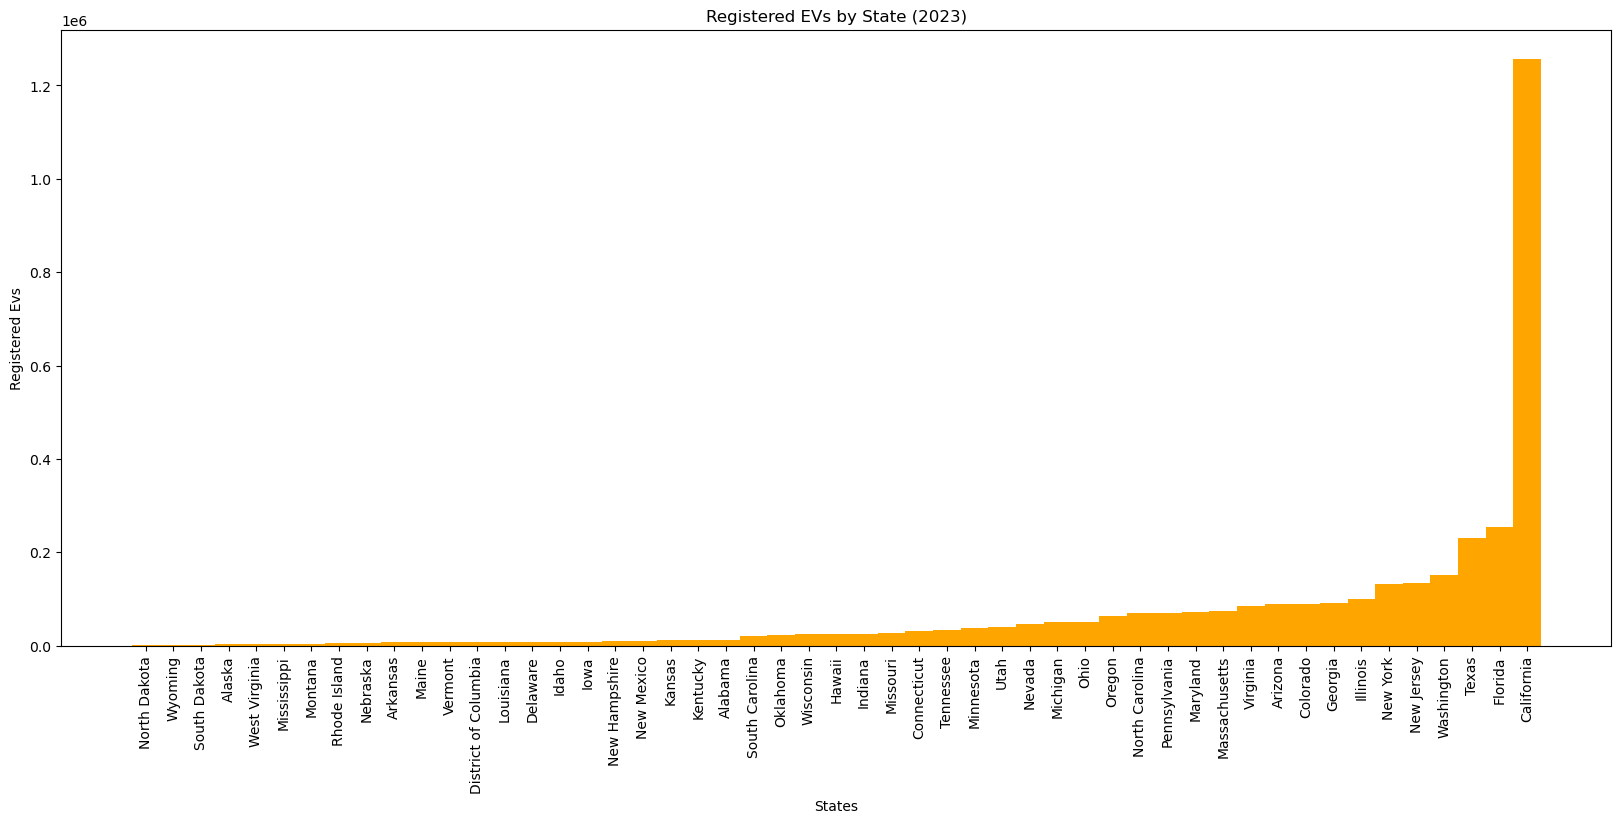

In [13]:

plt.figure(figsize=(20, 8))
plt.bar(ev_df_states['State'], ev_df_states['Electric (EV)'], width= 1, color="orange")
plt.title('Registered EVs by State (2023)')
plt.xlabel('States')
plt.ylabel('Registered Evs')
plt.xticks(rotation=90, ha='center')

In [14]:
plt.savefig('Output/evStates_figure.png')

<Figure size 640x480 with 0 Axes>

In [15]:
browser.quit()

In [16]:
ev_df_count = ev_df
ev_df_count.rename(columns={'State': 'state_name', 'Electric (EV)': 'EV'}, inplace=True)
ev_df_count.head()

,state_name,EV
0,Alabama,13000
1,Alaska,2700
2,Arizona,89800
3,Arkansas,7100
4,California,1256600


In [17]:
# Load csv output files from pgAdmin4
df1 = pd.read_csv('Output/state_stations.csv')
df_2 = pd.read_csv('Output/access_stations.csv')
df_3 = pd.read_csv('Output/status_stations.csv')
locations = pd.read_csv('Output/State_Coordinates.csv')

In [18]:
# Transforming df_2 and df_3 to add columns for data.js
df2 = df_2.pivot_table(index = 'state', columns='access_code', values='station_count', fill_value=0)
df2.reset_index(inplace=True)
df2.reset_index(drop=True, inplace=True)

df3 = df_3.pivot_table(index='state', columns='status_code', values='station_count', fill_value=0)
df3.reset_index(inplace=True)
df3.reset_index(drop=True, inplace=True)

In [19]:
locations['location'] = locations.apply(lambda row: f"[{row['Latitude']}, {row['Longitude']}]", axis=1)

In [20]:
# Merge the df1-df3 with the locations
df1 = pd.merge(df1, locations[['state', 'location']], on ='state', how='inner')
df2 = pd.merge(df2, locations[['state', 'location']], on ='state', how='inner')
df3 = pd.merge(df3, locations[['state', 'location']], on ='state', how='inner')
ev_df_count = pd.merge(ev_df_count, locations[['state_name', 'location']], on = 'state_name', how='left')

In [21]:
# Convert df1 to JavaScript array format
js_output_state_stations = "let state_stations = [\n"
for index, row in df1.iterrows():
    js_output_state_stations += f"  {{\n    state: \"{row['state']}\",\n    location: {row['location']},\n    station_count: {row['station_count']}\n  }},\n"
js_output_state_stations = js_output_state_stations.rstrip(',\n') + "\n];"

# Convert df2 to JavaScript array format
js_output_access_stations = "let access_stations = [\n"
for index, row in df2.iterrows():
    js_output_access_stations += f"  {{\n    state: \"{row['state']}\",\n    location: {row['location']},\n    private: {row['private']},\n    public: {row['public']}\n  }},\n"
js_output_access_stations = js_output_access_stations.rstrip(',\n') + "\n];"

# Convert df3 to JavaScript array format
js_output_status_stations = "let status_stations = [\n"
for index, row in df3.iterrows():
    js_output_status_stations += f"  {{\n    state: \"{row['state']}\",\n    location: {row['location']},\n    Available: {row['E']},\n    Planned: {row['P']},\n    Temporarily_Unavailable: {row['T']}\n  }},\n"
js_output_status_stations = js_output_status_stations.rstrip(',\n') + "\n];"

# Convert ev_df to JavaScrip array format
js_output_ev_df = "let ev_df = [\n"
for index, row in ev_df_count.iterrows():
    js_output_ev_df += f"  {{\n    state: \"{row['state_name']}\",\n    location: {row['location']},\n    count: {row['EV']}\n  }},\n"
js_output_ev_df = js_output_ev_df.rstrip(',\n') + "\n];"

In [22]:
# Prepare the JavaScript content
js_content = f"""// pgAdmin4 outputs
{js_output_state_stations}
{js_output_access_stations}
{js_output_status_stations}
{js_output_ev_df}
"""

In [23]:
# Write data.js
output_path = Path("data1.js")
with open(output_path, 'w') as f:
    f.write(js_content)

print(f"Data exported to {output_path}")

Data exported to data1.js
